In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, naive_bayes
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import lightgbm as lgb
import joblib

Accuracy = 0.6745625



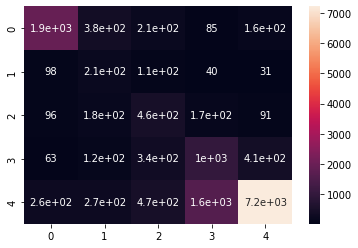

In [2]:
df = pd.read_csv("../input/amazon-dataset-csv-generator/PolynomialInternshipDrive2022.csv", nrows = 80000 )
df = df.dropna()
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=42, stratify=df.overall.values)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

tfidf_vec = TfidfVectorizer(
 tokenizer=word_tokenize,
 token_pattern=None
 )

tfidf_vec.fit(train_df.review)

xtrain = tfidf_vec.transform(train_df.review)
xtest = tfidf_vec.transform(test_df.review)

model = lgb.LGBMClassifier(device_type='gpu')


model.fit(xtrain, train_df.overall)

preds = model.predict(xtest)
# calculate accuracy
accuracy = metrics.accuracy_score(test_df.overall, preds)

confusion_matrix = metrics.confusion_matrix(preds, test_df.overall)
        
sns.heatmap(confusion_matrix, annot=True)
joblib.dump(model,"lgbmclf_1.pkl" )
joblib.dump(tfidf_vec,"tfidf_lgbm_1.pkl")
print(f"Accuracy = {accuracy}")
print("")
